# Introduction

Hey, thanks for viewing my Kernel!

If you like my work, please, leave an upvote: it will be really appreciated and it will motivate me in offering more content to the Kaggle community ! 😊

In [1]:
import pandas as pd
import numpy as np
import warnings


warnings.simplefilter("ignore")

train = pd.read_csv("../input/tabular-playground-series-jan-2022/train.csv")
test = pd.read_csv("../input/tabular-playground-series-jan-2022/test.csv")
train

,row_id,date,country,store,product,num_sold
0,0,2015-01-01,Finland,KaggleMart,Kaggle Mug,329
1,1,2015-01-01,Finland,KaggleMart,Kaggle Hat,520
2,2,2015-01-01,Finland,KaggleMart,Kaggle Sticker,146
3,3,2015-01-01,Finland,KaggleRama,Kaggle Mug,572
4,4,2015-01-01,Finland,KaggleRama,Kaggle Hat,911
...,...,...,...,...,...,...
26293,26293,2018-12-31,Sweden,KaggleMart,Kaggle Hat,823
26294,26294,2018-12-31,Sweden,KaggleMart,Kaggle Sticker,250
26295,26295,2018-12-31,Sweden,KaggleRama,Kaggle Mug,1004
26296,26296,2018-12-31,Sweden,KaggleRama,Kaggle Hat,1441


# Data Cleaning

In [2]:
train.isna().sum()

row_id      0
date        0
country     0
store       0
product     0
num_sold    0
dtype: int64

# Feature Engineering

In [3]:
train['date'] = pd.to_datetime(train['date'])
train['year'] = train['date'].dt.year
train['month'] = train['date'].dt.month
train['day'] = train['date'].dt.day
train['dayofweek'] = train['date'].dt.dayofweek
train['dayofmonth'] = train['date'].dt.days_in_month
train['dayofyear'] = train['date'].dt.dayofyear
train['weekday'] = train['date'].dt.weekday
train['weekofyear'] = train['date'].dt.weekofyear

# Exploratory Data Analysis

In [4]:
train.groupby('country').agg({'num_sold':'sum'})

,num_sold
country,
Finland,2680927
Norway,4404706
Sweden,3105725


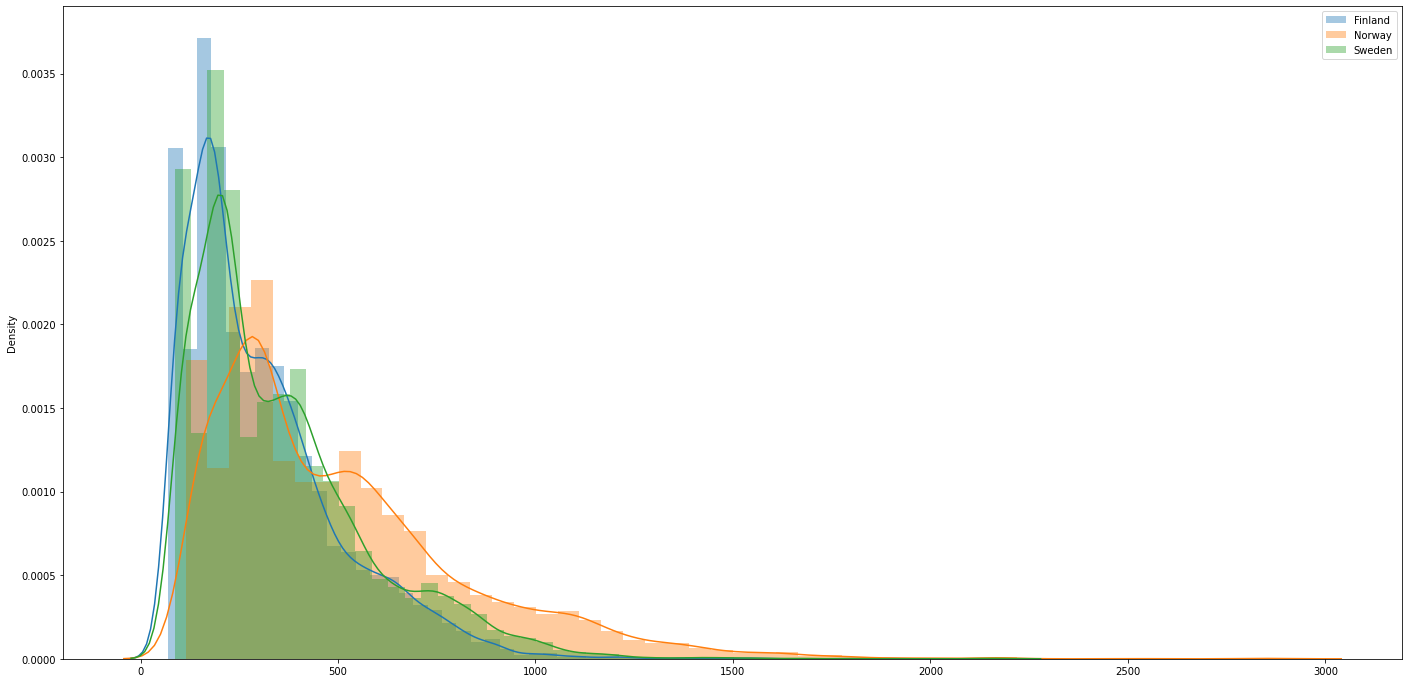

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(24, 12))
sns.distplot(x=train.loc[train['country']=='Finland','num_sold'], label='Finland', ax=ax)
sns.distplot(x=train.loc[train['country']=='Norway','num_sold'], label='Norway', ax=ax)
sns.distplot(x=train.loc[train['country']=='Sweden','num_sold'], label='Sweden', ax=ax)
plt.legend()
plt.show()

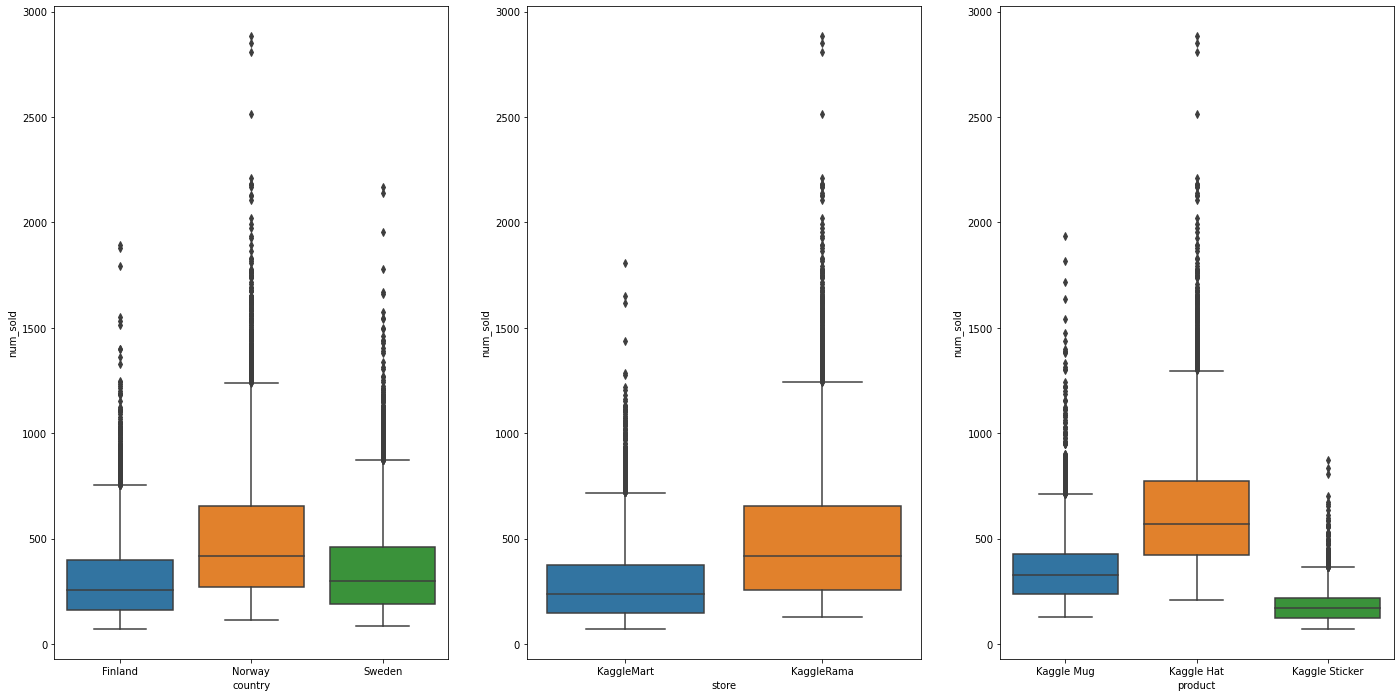

In [6]:
fig, ax = plt.subplots(1, 3, figsize=(24, 12))
sns.boxplot(data=train, x='country', y='num_sold', ax=ax[0])
sns.boxplot(data=train, x='store', y='num_sold', ax=ax[1])
sns.boxplot(data=train, x='product', y='num_sold', ax=ax[2])
plt.show()

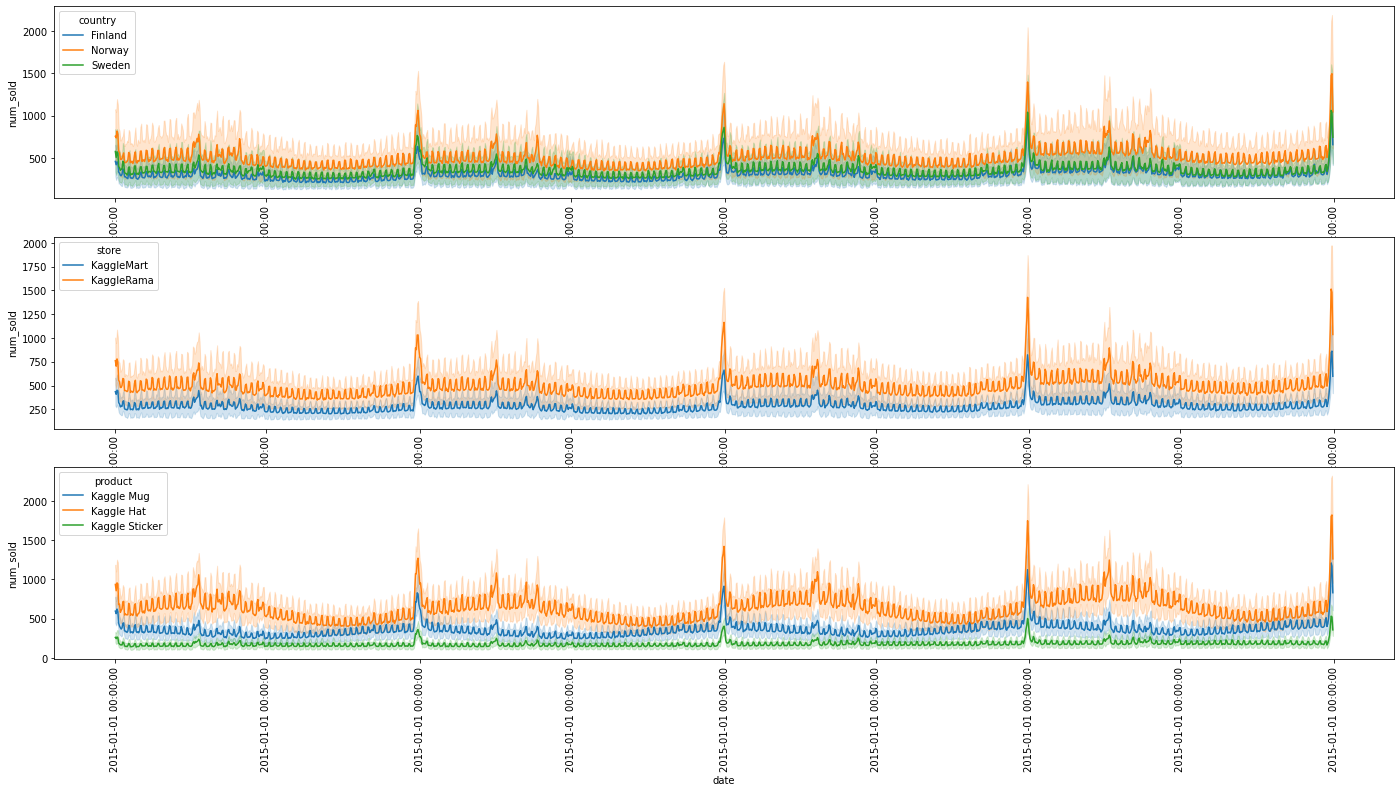

In [7]:
fig, ax = plt.subplots(3, 1, figsize=(24, 12))
sns.lineplot(data=train, x='date', y='num_sold', hue='country', ax=ax[0])
ax[0].set_xticklabels(train['date'], rotation=90)
sns.lineplot(data=train, x='date', y='num_sold', hue='store', ax=ax[1])
ax[1].set_xticklabels(train['date'], rotation=90)
sns.lineplot(data=train, x='date', y='num_sold', hue='product', ax=ax[2])
ax[2].set_xticklabels(train['date'], rotation=90)
plt.show()

## Correlations

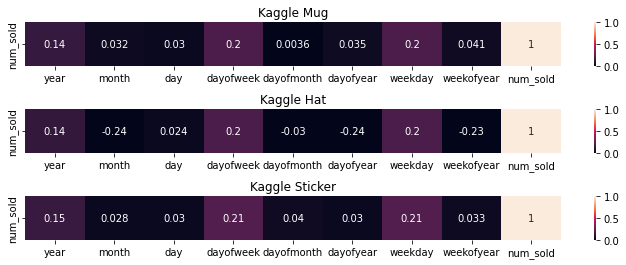

In [8]:
fig, ax = plt.subplots(3, 1, figsize=(12, 4))
plt.subplots_adjust(hspace=1)
feature_list = ['year', 'month', 'day', 'dayofweek', 'dayofmonth', 'dayofyear', 'weekday', 'weekofyear', 'num_sold']
sns.heatmap(train.loc[train['product']=='Kaggle Mug', feature_list].corr().iloc[-1:, :], annot=True, vmin=0, vmax=1, ax=ax[0])
ax[0].set_title('Kaggle Mug')
sns.heatmap(train.loc[train['product']=='Kaggle Hat', feature_list].corr().iloc[-1:, :], annot=True, vmin=0, vmax=1, ax=ax[1])
ax[1].set_title('Kaggle Hat')
sns.heatmap(train.loc[train['product']=='Kaggle Sticker', feature_list].corr().iloc[-1:, :], annot=True, vmin=0, vmax=1, ax=ax[2])
ax[2].set_title('Kaggle Sticker')
plt.show()

## P-values

In [9]:
from scipy.stats import pearsonr

p_feature_list = ['year', 'month', 'day', 'dayofweek', 'dayofmonth', 'dayofyear', 'weekday', 'weekofyear']
p_dict = {}
p_mug_list = []
p_hat_list = []
p_sticker_list = []
for c in p_feature_list:
    p = round(pearsonr(train.loc[train['product']=='Kaggle Mug','num_sold'], train.loc[train['product']=='Kaggle Mug',c])[1], 4)
    p_mug_list.append(p)
    p = round(pearsonr(train.loc[train['product']=='Kaggle Hat','num_sold'], train.loc[train['product']=='Kaggle Hat',c])[1], 4)
    p_hat_list.append(p)
    p = round(pearsonr(train.loc[train['product']=='Kaggle Sticker','num_sold'], train.loc[train['product']=='Kaggle Sticker',c])[1], 4)
    p_sticker_list.append(p)
p_dict['Kaggle Mug'] = p_mug_list
p_dict['Kaggle Hat'] = p_hat_list
p_dict['Kaggle Sticker'] = p_sticker_list
p_values_df = pd.DataFrame(p_dict, columns=p_dict.keys(), index=p_feature_list)

def p_value_warning_background(cell_value):
    highlight = 'background-color: lightcoral;'
    default = ''
    if cell_value > 0.05:
            return highlight
    return default

p_values_df.style.applymap(p_value_warning_background)

,Kaggle Mug,Kaggle Hat,Kaggle Sticker
year,0.000000,0.000000,0.000000
month,0.002400,0.000000,0.008400
day,0.004900,0.024900,0.005400
dayofweek,0.000000,0.000000,0.000000
dayofmonth,0.735200,0.004400,0.000200
dayofyear,0.000900,0.000000,0.004700
weekday,0.000000,0.000000,0.000000
weekofyear,0.000100,0.000000,0.001800


## Distributions

In [10]:
pip install pmdarima

     |████████████████████████████████| 1.4 MB 517 kB/s            
Note: you may need to restart the kernel to use updated packages.


### Kaggle Mug

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


,coef,std err,z,P>|z|,[0.025,0.975]
ar.L1,-0.9995,0.000,-2075.507,0.000,-1.000,-0.999
ma.L1,0.9401,0.002,424.454,0.000,0.936,0.944
ar.S.L7,-0.9995,0.002,-544.326,0.000,-1.003,-0.996
ma.S.L7,0.9982,0.004,226.721,0.000,0.990,1.007
sigma2,2.675e+04,333.165,80.281,0.000,2.61e+04,2.74e+04


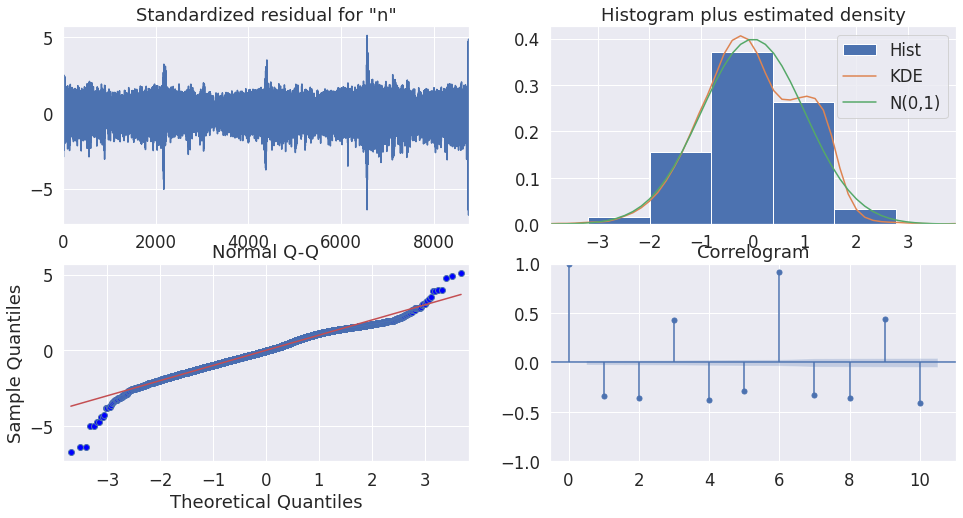

In [11]:
from pmdarima import auto_arima
import statsmodels.api as sm

mod = sm.tsa.statespace.SARIMAX(train.loc[train['product']=='Kaggle Mug','num_sold'],
                                order=(1,1,1),
                                seasonal_order=(1, 1, 1, 7))
results = mod.fit(disp=False)
display(results.summary().tables[1])

sns.set(font_scale=1.5)
results.plot_diagnostics(figsize=(16, 8))
plt.show()

### Kaggle Hat

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


,coef,std err,z,P>|z|,[0.025,0.975]
ar.L1,-0.9983,0.001,-1441.381,0.000,-1.000,-0.997
ma.L1,0.9532,0.002,408.628,0.000,0.949,0.958
ar.S.L7,-0.9996,0.001,-1320.721,0.000,-1.001,-0.998
ma.S.L7,0.9968,0.003,285.054,0.000,0.990,1.004
sigma2,8.508e+04,1207.004,70.486,0.000,8.27e+04,8.74e+04


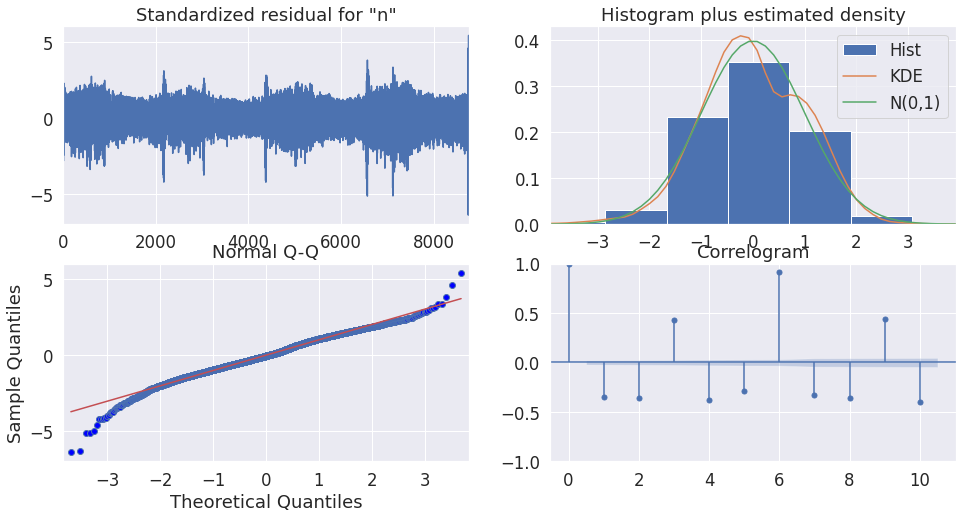

In [12]:
mod = sm.tsa.statespace.SARIMAX(train.loc[train['product']=='Kaggle Hat','num_sold'],
                                order=(1,1,1),
                                seasonal_order=(1, 1, 1, 7))
results = mod.fit(disp=False)
display(results.summary().tables[1])

sns.set(font_scale=1.5)
results.plot_diagnostics(figsize=(16, 8))
plt.show()

### Kaggle Sticker

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


,coef,std err,z,P>|z|,[0.025,0.975]
ar.L1,-0.9970,0.001,-888.909,0.000,-0.999,-0.995
ma.L1,0.9427,0.003,302.813,0.000,0.937,0.949
ar.S.L7,-0.9997,0.001,-1438.856,0.000,-1.001,-0.998
ma.S.L7,0.9968,0.004,256.304,0.000,0.989,1.004
sigma2,6727.3786,109.956,61.182,0.000,6511.868,6942.889


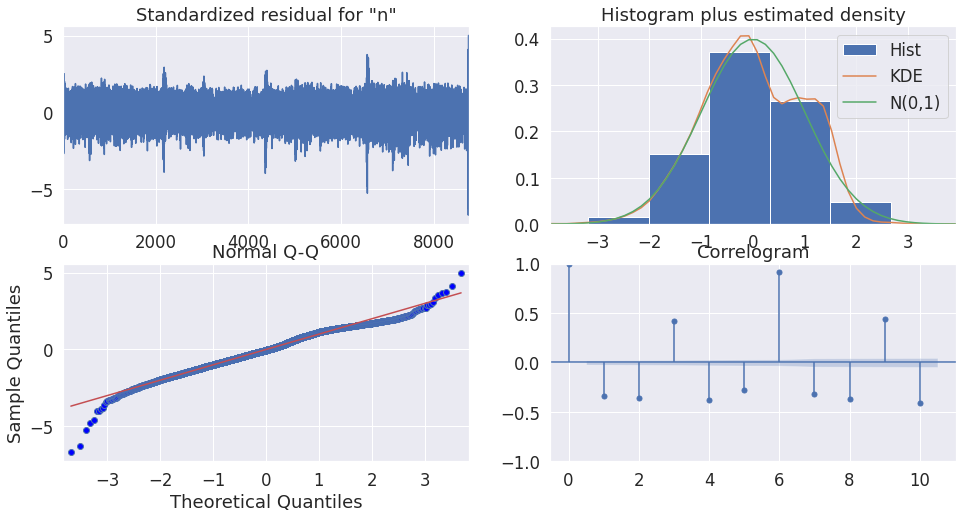

In [13]:
mod = sm.tsa.statespace.SARIMAX(train.loc[train['product']=='Kaggle Sticker','num_sold'],
                                order=(1,1,1),
                                seasonal_order=(1, 1, 1, 7))
results = mod.fit(disp=False)
display(results.summary().tables[1])

sns.set(font_scale=1.5)
results.plot_diagnostics(figsize=(16, 8))
plt.show()